## Descriptive Statistics

Descriptive statistics are measures that summarize important features of data.

Two common types of Descriptive Statistics are measures of Central Tendency and measures of Variation of Data.

Measures of Central Tendency are the Arithmetic Mean, Median and Mode

Common measures of Variation are: range, Interquartile Range, Variance , Standard Deviation and the Coefficient of Variance

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [3]:
os.getcwd()

'c:\\Python\\Learning Python for quantitative finance\\Python for Economics'

In [4]:
os.chdir('C:/Users/George Bresnahan/OneDrive/Desktop/Python Datasets/archive')
os.getcwd()
os.listdir()

['mtcars.csv']

In [5]:
car_data = pd.read_csv('mtcars.csv')
car_data.head(5)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
mtcars = car_data.rename(columns={'Unnamed: 0' : 'model'})
mtcars.index = mtcars.model 
# del mtcars["model"]
mtcars = mtcars.drop('model', axis = 1)
mtcars.head(5)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [7]:
mtcars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

Here we have the Arithmetic mean of each column. The arithmetic mean is simply the sum of all population values (column values) divided by the population size(number of rows)
n.b The arithmetic mean is effected by extreme values(outliers)

We can get the Median value of each colmn as well. The Median value is the middle value in an ordered list, it means that 50% of observations are below and 50% above, the median is not affected by extreme values.

In [8]:
mtcars.median()
print(mtcars.shape)

(32, 11)


C:\Users\George Bresnahan\AppData\Local\Temp\ipykernel_7592\467910146.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(mtcars.hp, shade = True)


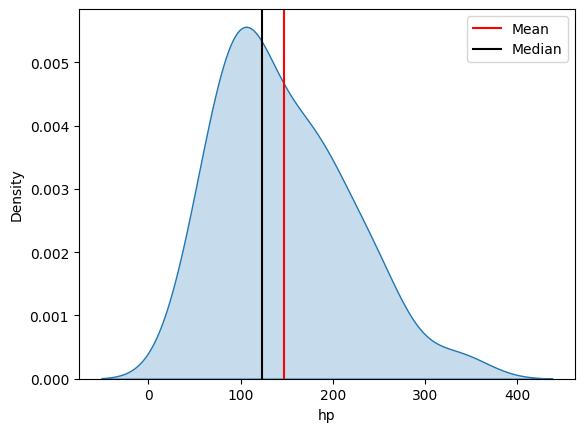

In [9]:
# To better understand the distribution of Data we plot a Probability density plot.

sns.kdeplot(mtcars.hp, shade = True)
plt.axvline(mtcars.hp.mean(), color = 'red', label = 'Mean')
plt.axvline(mtcars.hp.median(), color = 'black', label = 'Median')
plt.legend()
plt.show()

We can see that the data is Right-skewed as the median is < the mean value. The distribution is not symmetric

We can check this using pd.skew()

In [10]:
mtcars.hp.skew()

np.float64(0.7994066925956381)

We have a skew value of 0.799 meaning that the value is moderately skewed. The value is positive indicating the skew is right tailed. As we can see visually

We also are interested in the mode as a measure of central tendency.

In [11]:
mtcars.mode()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,10.4,8.0,275.8,110.0,3.07,3.44,17.02,0.0,0.0,3.0,2.0
1,15.2,NaN,NaN,175.0,3.92,NaN,18.90,NaN,NaN,NaN,4.0
2,19.2,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,22.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,30.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we have multiple modes as shown by the multiple values per column. Columns with no mode return NAN

## Measures of Variation / Spread

Measures of variation / dispersion are statistics that describe how data varies. While measures fo central tendency provide ideas of the typical values, measures of spread give us a sense of how much the data tends to diverge from a typical value. The variability of the data values. This is important as distributions can have the same center but different levels of variation.

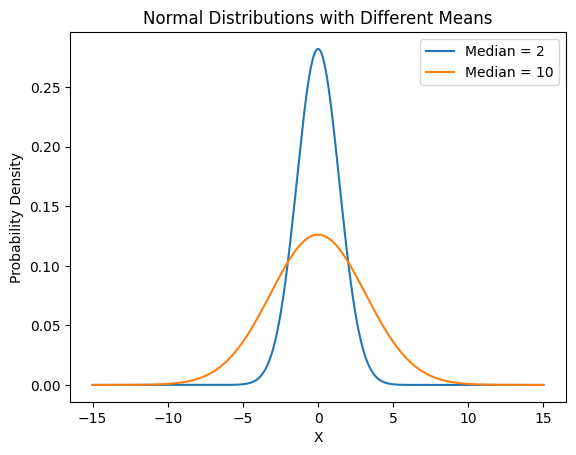

In [12]:
import scipy.stats as stats

graph1data = stats.norm
x_values = np.linspace(-15,15,1000)
var1, var2 = 2 , 10
graph1data = stats.norm.pdf(x_values, loc = 0, scale = np.sqrt(var1))
graph2data = stats.norm.pdf(x_values, loc = 0, scale = np.sqrt(var2))

plt.plot(x_values, graph1data, label = f'Median = {var1}')
plt.plot(x_values, graph2data, label = f'Median = {var2}')
plt.legend()
plt.title('Normal Distributions with Different Means')
plt.xlabel('X')
plt.ylabel('Probability Density')
plt.show()


Notice how these distributions have teh same centre but different variations.

The simplest measure of variation is the **range** which is the difference between the largest and smallest value.

In [13]:
mtcars.hp.max() - mtcars.hp.min()

np.int64(283)

A large Disadvantage of the range for assessing the spread of the data is that it ignores the way in which data is distributed, two datasets can have the same range but there values be spread differently. The range is also sensitive to outliers. We can eliminate this problem by using the Interquartile Range. Which eliminates hign and low values and caluculates the range of the middle 50% of the data.

In [14]:
Box_and_whisker_plot_figures = [mtcars['hp'].quantile(0),
                                mtcars['hp'].quantile(0.25),
                                mtcars['hp'].quantile(0.5),
                                mtcars['hp'].quantile(0.75),
                                mtcars['hp'].quantile(1)]

print(Box_and_whisker_plot_figures)

IQR = Box_and_whisker_plot_figures[3] - Box_and_whisker_plot_figures[1]

print(IQR)

[np.float64(52.0), np.float64(96.5), np.float64(123.0), np.float64(180.0), np.float64(335.0)]
83.5


Since these values are so commonly used to describe data, they are known as "The five number summary". They are the same percentile values returned by df.describe.

In [15]:
stats = mtcars["hp"].describe()
stats

count     32.000000
mean     146.687500
std       68.562868
min       52.000000
25%       96.500000
50%      123.000000
75%      180.000000
max      335.000000
Name: hp, dtype: float64

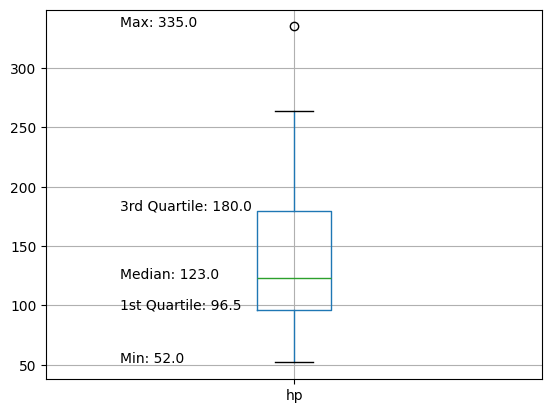

In [16]:
ax = mtcars.boxplot(column = "hp")

stats_to_label = {
    'Min' : stats["min"],
    '1st Quartile' : stats["25%"],
    'Median' : stats["50%"],
    '3rd Quartile' : stats["75%"],
    'Max' : stats["max"]}

for label, value in stats_to_label.items():
    plt.text(0.65, value, f'{label}: {value}', color = 'black', fontsize = 10)

plt.show()


Variance and Standard Deviation are two common measures of the variability of Spread/Variability. The variance of data is the average of Squared deviations of values from the mean. We can access this using pandas.var(). This returns the sample variance which is divided by n-1 due to Bessel's correction.

In [17]:
mtcars['hp'].var()

np.float64(4700.866935483871)

The standard deviation is the most commonly used measure of variation, showing variation about the mean. The standard deviation is expressed in the same units as the original data, which means that it is more interpretable than the variance. The standard deviation is the square root of the variance.

In [19]:
std = mtcars['hp'].std()
print(std)
print(std ** 2)

68.56286848932059
4700.86693548387


Another measure of spread/variability is the **Coefficient of Variation**. The Coefficient of Variatioin measures the relative variation and is expressed in percentage form, it shows the variation relative to the mean. The utility of this value is for comparison of the variability of one data series to another, despite the fact the data may be measured in different units.

To calculate this figure we divide the standard deviation of the data by the mean value and convert this to percentage form.

In [22]:
CV = mtcars['hp'].std() / mtcars['hp'].mean()
print(CV)
CV_perc = (f"{CV:.2%}")
print(CV_perc)

0.467407710195624
46.74%


## Skewness and Kurtosis

Text taken from a KAGGLE notebook.

Beyond measures of center and spread, descriptive statistics include measures that give you a sense of the shape of a distribution. Skewness measures the skew or asymmetry of a distribution while kurtosis measures how much data is in the tails of a distribution vs the center. Pandas has built in functions for cheking skewness and kurtosis.

N.b these are the third and fourth Standardised moments.
Moments in statistics are quantitative measures that descrive the specific characteristics of a probability distribution. It helps to understand the data set's shape, spread and central tendency.

1st Moment = Mean
2nd Moment = Variance and Standard Deviation
3rd Moment = Skewness
4th Moment = Kurtosis

Recap Aside:

Skewness is the third moment, which measure the deviation of the given distribution of a random variable from the symmetric distribution. Positive Skewness, means that extreme data values are greater, which is why the mean is greater than the median. Negative Skewness means that extreme data values are smaller in value.

Kurtosis is the fourth moment , which measures the presence of outliers in the distribution. It gives the graph as either heavily tailed or lightly tailed depending on the presence of outliers. Kurtosis in simple terms measures the peakedness, or flatness of a distribution.

If the kurtosis has a shorter tail and a flat top, Kurtosis is said to be high.

If the graph has a higher peak and a lower tail, then the kurtosis is said to be low.

There are three types of Kurtosis:

**Mesokurtic** = This is the same as the Normal distribution. Kurtosis value = 3

**Leptokurtic** = This distribution indicates that a more significant percentage of data is present near the tail, which implies a longer tail, Kurtosis value > 3 Peaked Prone to extreme values 

**Platykurtic** = This distribution indicates that there is less data in the tail portion, which implies a shorter tail. Kurtosis value < 3  Flatter, small probability of extreme values/ small outliers in a distribution.



In [24]:
mtcars['hp'].kurt()

np.float64(0.2752115875371124)

The kurtosis value 0.27 which would imply the distribution is Leptokurtic and has extreme outliers in the distribution. Which is evident in our probability density plot.